In [1]:
import pandas as pd
import numpy as np
#import tensorflow as tf
#from tensorflow import keras
import matplotlib.pyplot as plt
#from random import randrange, shuffle
from os import path
#import librosa
#from librosa.display import specshow
#import IPython.display as ipd
#from math import floor
#import time
from statistics import mean

In [2]:
csvPath = r"F:\labeled_audio_data.csv"
dataFrame  = pd.read_csv(csvPath)
dataDict   = dataFrame.to_dict()

In [3]:
print("Total number of Files:", len(list(dataFrame["mainSound"])))
print()

for key in dataFrame.keys():
    print("Key Name: " + key)
    try:
        print("Mean:    ", round(dataFrame[key].mean(), 3))
    except:
        pass
    print()

Total number of Files: 3130

Key Name: Unnamed: 0
Mean:     1564.5

Key Name: filename

Key Name: mainSound

Key Name: length
Mean:     4.944

Key Name: sampleRate
Mean:     40574.169

Key Name: quality
Mean:     6.475

Key Name: isCut
Mean:     0.869

Key Name: isMixed
Mean:     0.131

Key Name: isChecked
Mean:     0.307

Key Name: threat
Mean:     3.569

Key Name: salience
Mean:     6.396

Key Name: importance
Mean:     3.827



In [4]:
sounds = dataFrame['mainSound'].unique()
for sound in sounds:
    print("Sound: " + str(sound).ljust(17), end=" | ")
    df = dataFrame[dataFrame["mainSound"] == sound]
    print("Count:    ", df.shape[0])
    allValues = [df.to_dict()['threat'].values(), df.to_dict()['salience'].values(), df.to_dict()['importance'].values()]
    valueTypes = ["threat", "salience", "importance"]
    for i in range(len(allValues)):
        averageValue = mean(allValues[i])
        print("Avg", valueTypes[i].ljust(10, " ") , ":", str(round(averageValue, 3)).ljust(5, " "), end=" | ")
    print()
    print()

Sound: natural           | Count:     330
Avg threat     : 1.058 | Avg salience   : 3.033 | Avg importance : 1.288 | 

Sound: siren             | Count:     1150
Avg threat     : 7.648 | Avg salience   : 8.884 | Avg importance : 8.893 | 

Sound: exterior          | Count:     487
Avg threat     : 0.565 | Avg salience   : 5.532 | Avg importance : 0.431 | 

Sound: interior          | Count:     463
Avg threat     : 1.354 | Avg salience   : 5.566 | Avg importance : 0.192 | 

Sound: animal            | Count:     376
Avg threat     : 2.936 | Avg salience   : 5.101 | Avg importance : 2.622 | 

Sound: human             | Count:     319
Avg threat     : 0     | Avg salience   : 4.918 | Avg importance : 0     | 

Sound: emergency_vehicle | Count:     5
Avg threat     : 4     | Avg salience   : 9     | Avg importance : 8     | 



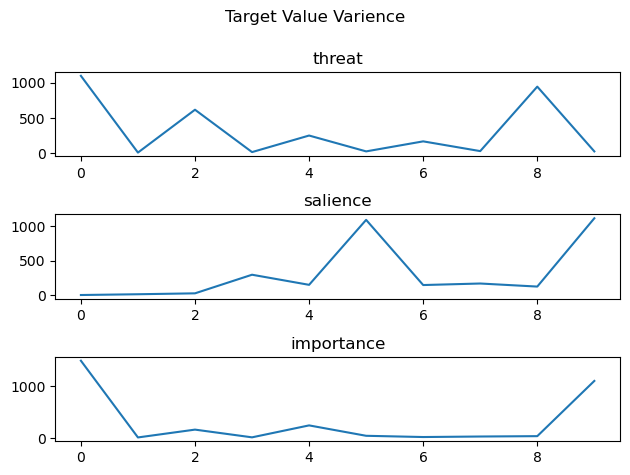

In [5]:
targetValues= ["threat", "salience", "importance"]
fig, axs = plt.subplots(3)
fig.suptitle("Target Value Varience")
for i in range(3):
    axs[i].set_title(targetValues[i])
    allValues = []
    allValues = list(dataDict[list(dataDict.keys())[i-3]].values())
    numVals = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for value in allValues:
        value = round(value)
        if value < 0:
            value = 0
        elif value > 9:
            value = 9
        numVals[value] += 1
    #numVals.sort(reverse = True)
    axs[i].plot(list(range(0,10)), numVals)
fig.tight_layout()
fig.subplots_adjust(top=0.85)